In [59]:
import ee
from drought.data import ee_climate, ee_utils, geo
from drought.visualization import plot
import geemap
import matplotlib.pyplot as plt
import pandas as pd
import importlib
importlib.reload(plot)

<module 'drought.visualization.plot' from '/Users/jovanaknezevic/drought-with-gedi/drought/visualization/plot.py'>

### Load Climate and GEDI data from CSV

In [30]:
climate_monthly = pd.read_csv("../../data/interim/climate_r_p_t_monthly_mean_per_polygon_1-2019_to_12-2022.csv", index_col=0)
gedi_monthly = pd.read_csv("../../data/interim/gedi_PAI_monthly_mean_per_polygon_4-2019_to_6-2022.csv", index_col=0)

### Plot total monthly values

Calculate monthly averages across all the available years and plot.

In [35]:
climate_total_monthly_mean = climate_monthly.groupby(['month', 'polygon_id']) \
                                            .mean(numeric_only=True) \
                                            .reset_index() \
                                            .drop(columns=['year'])

In [36]:
pai_total_monthly_mean = gedi_monthly.groupby(['month', 'polygon_id']) \
                                            .mean(numeric_only=True) \
                                            .reset_index() \
                                            .drop(columns=['year'])

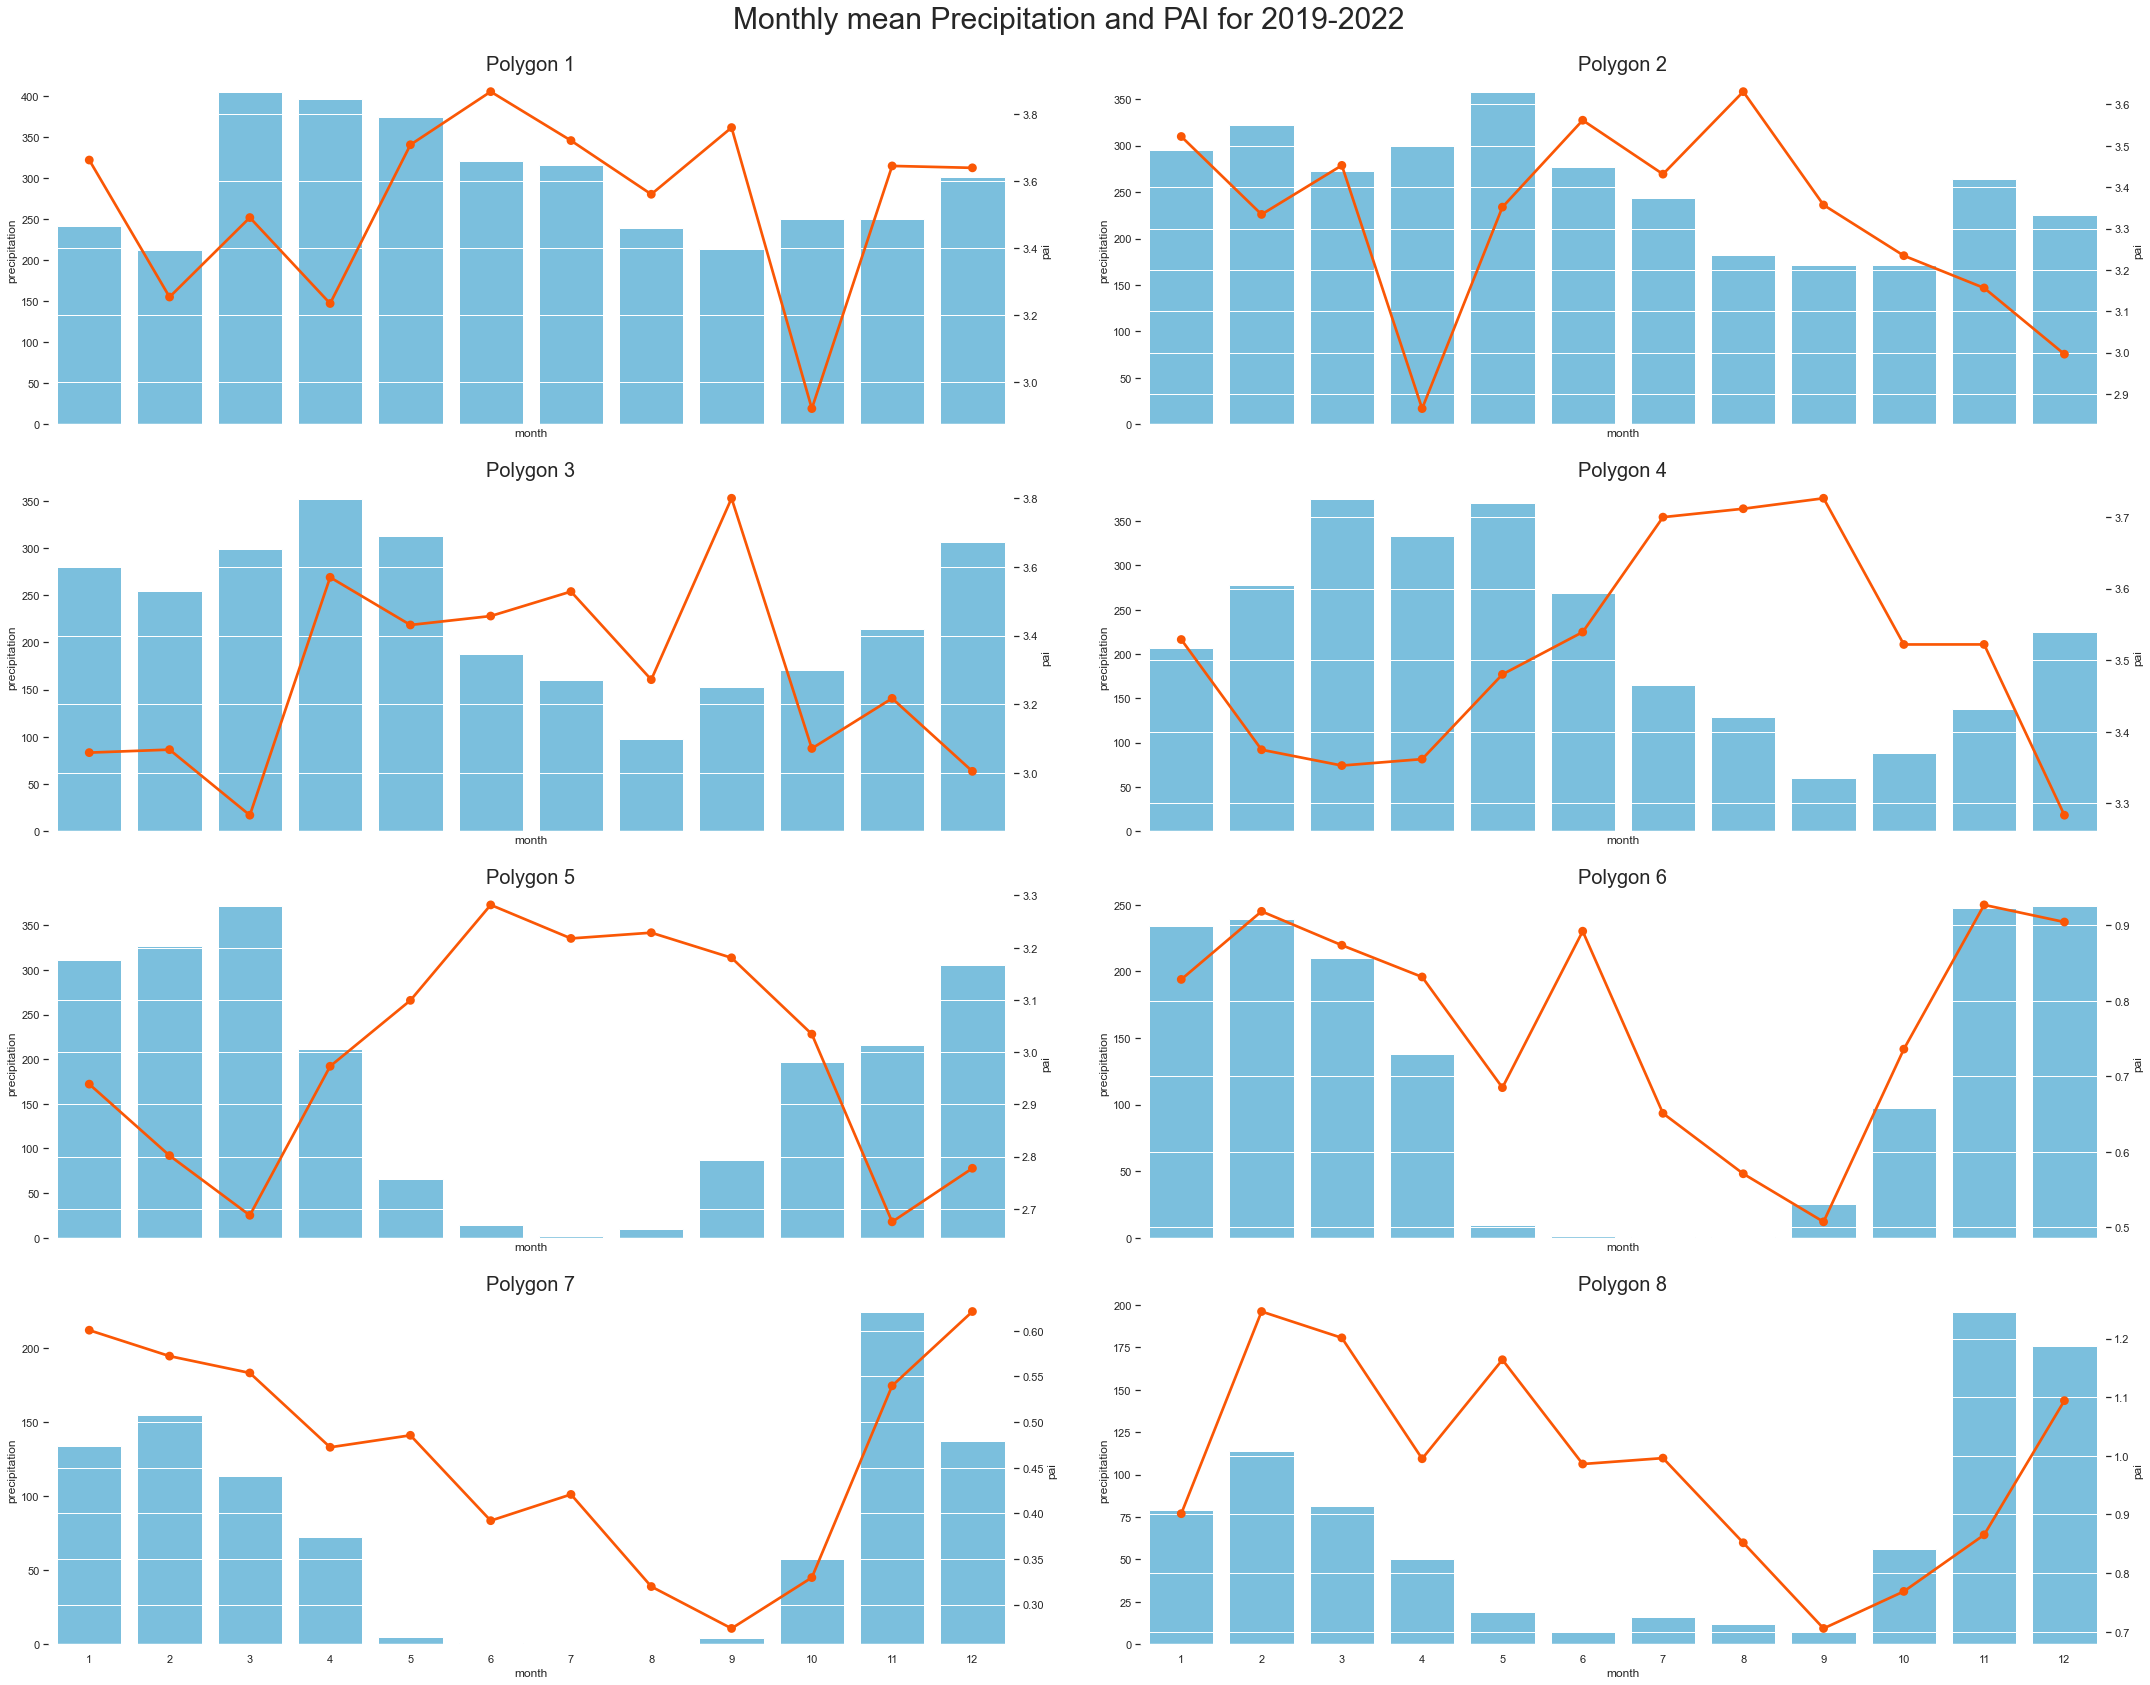

In [67]:
import seaborn as sns

sns.set()  # Setting seaborn as default style even if use only matplotlib
palette = sns.color_palette("hls", 8)
# TODO: join pandas
fig, ax = plt.subplots(4, 2, figsize=(30, 24), sharey=False, sharex=True)
fig.suptitle("Monthly mean Precipitation and PAI for 2019-2022", fontsize=30)
fig.tight_layout(pad=3.0, h_pad=4.0, w_pad=8.0)

for i in range(8):
    subplot = ax[i // 2, i % 2]
    subplot.set_facecolor('white')

    # Select polygon from the data. Polygon IDs go from 1 to 8, so we need
    # i + 1.
    polygon_id = i + 1
    climate_polygon_data = climate_total_monthly_mean[climate_total_monthly_mean['polygon_id'] == polygon_id]
    pai_polygon_data = pai_total_monthly_mean[pai_total_monthly_mean['polygon_id'] == polygon_id]

    # Plot.
    sns.barplot(climate_polygon_data, x='month', y='precipitation', color='#6BC5ED', ax=subplot)
    subplot.set_title(f"Polygon {polygon_id}", fontsize=20)
    #subplot.set_ylabel(ylabel)

    pai_subplot = subplot.twinx()
    sns.pointplot(pai_polygon_data, x='month', y='pai', color='#FA5705', ax=pai_subplot)

plt.savefig(f'../../reports/figures/exploratory/layered_monthly_mean_precipitation_pai_2019_to_2022.png')

### Join GEDI and Climate datasets

In [38]:
# Join data sets.
climate_indexed = climate_monthly.set_index(['month', 'year', 'polygon_id'])
gedi_indexed = gedi_monthly.set_index(['month', 'year', 'polygon_id'])
monthly_data = gedi_indexed.join(climate_indexed).reset_index()

### Plot climate vs. PAI

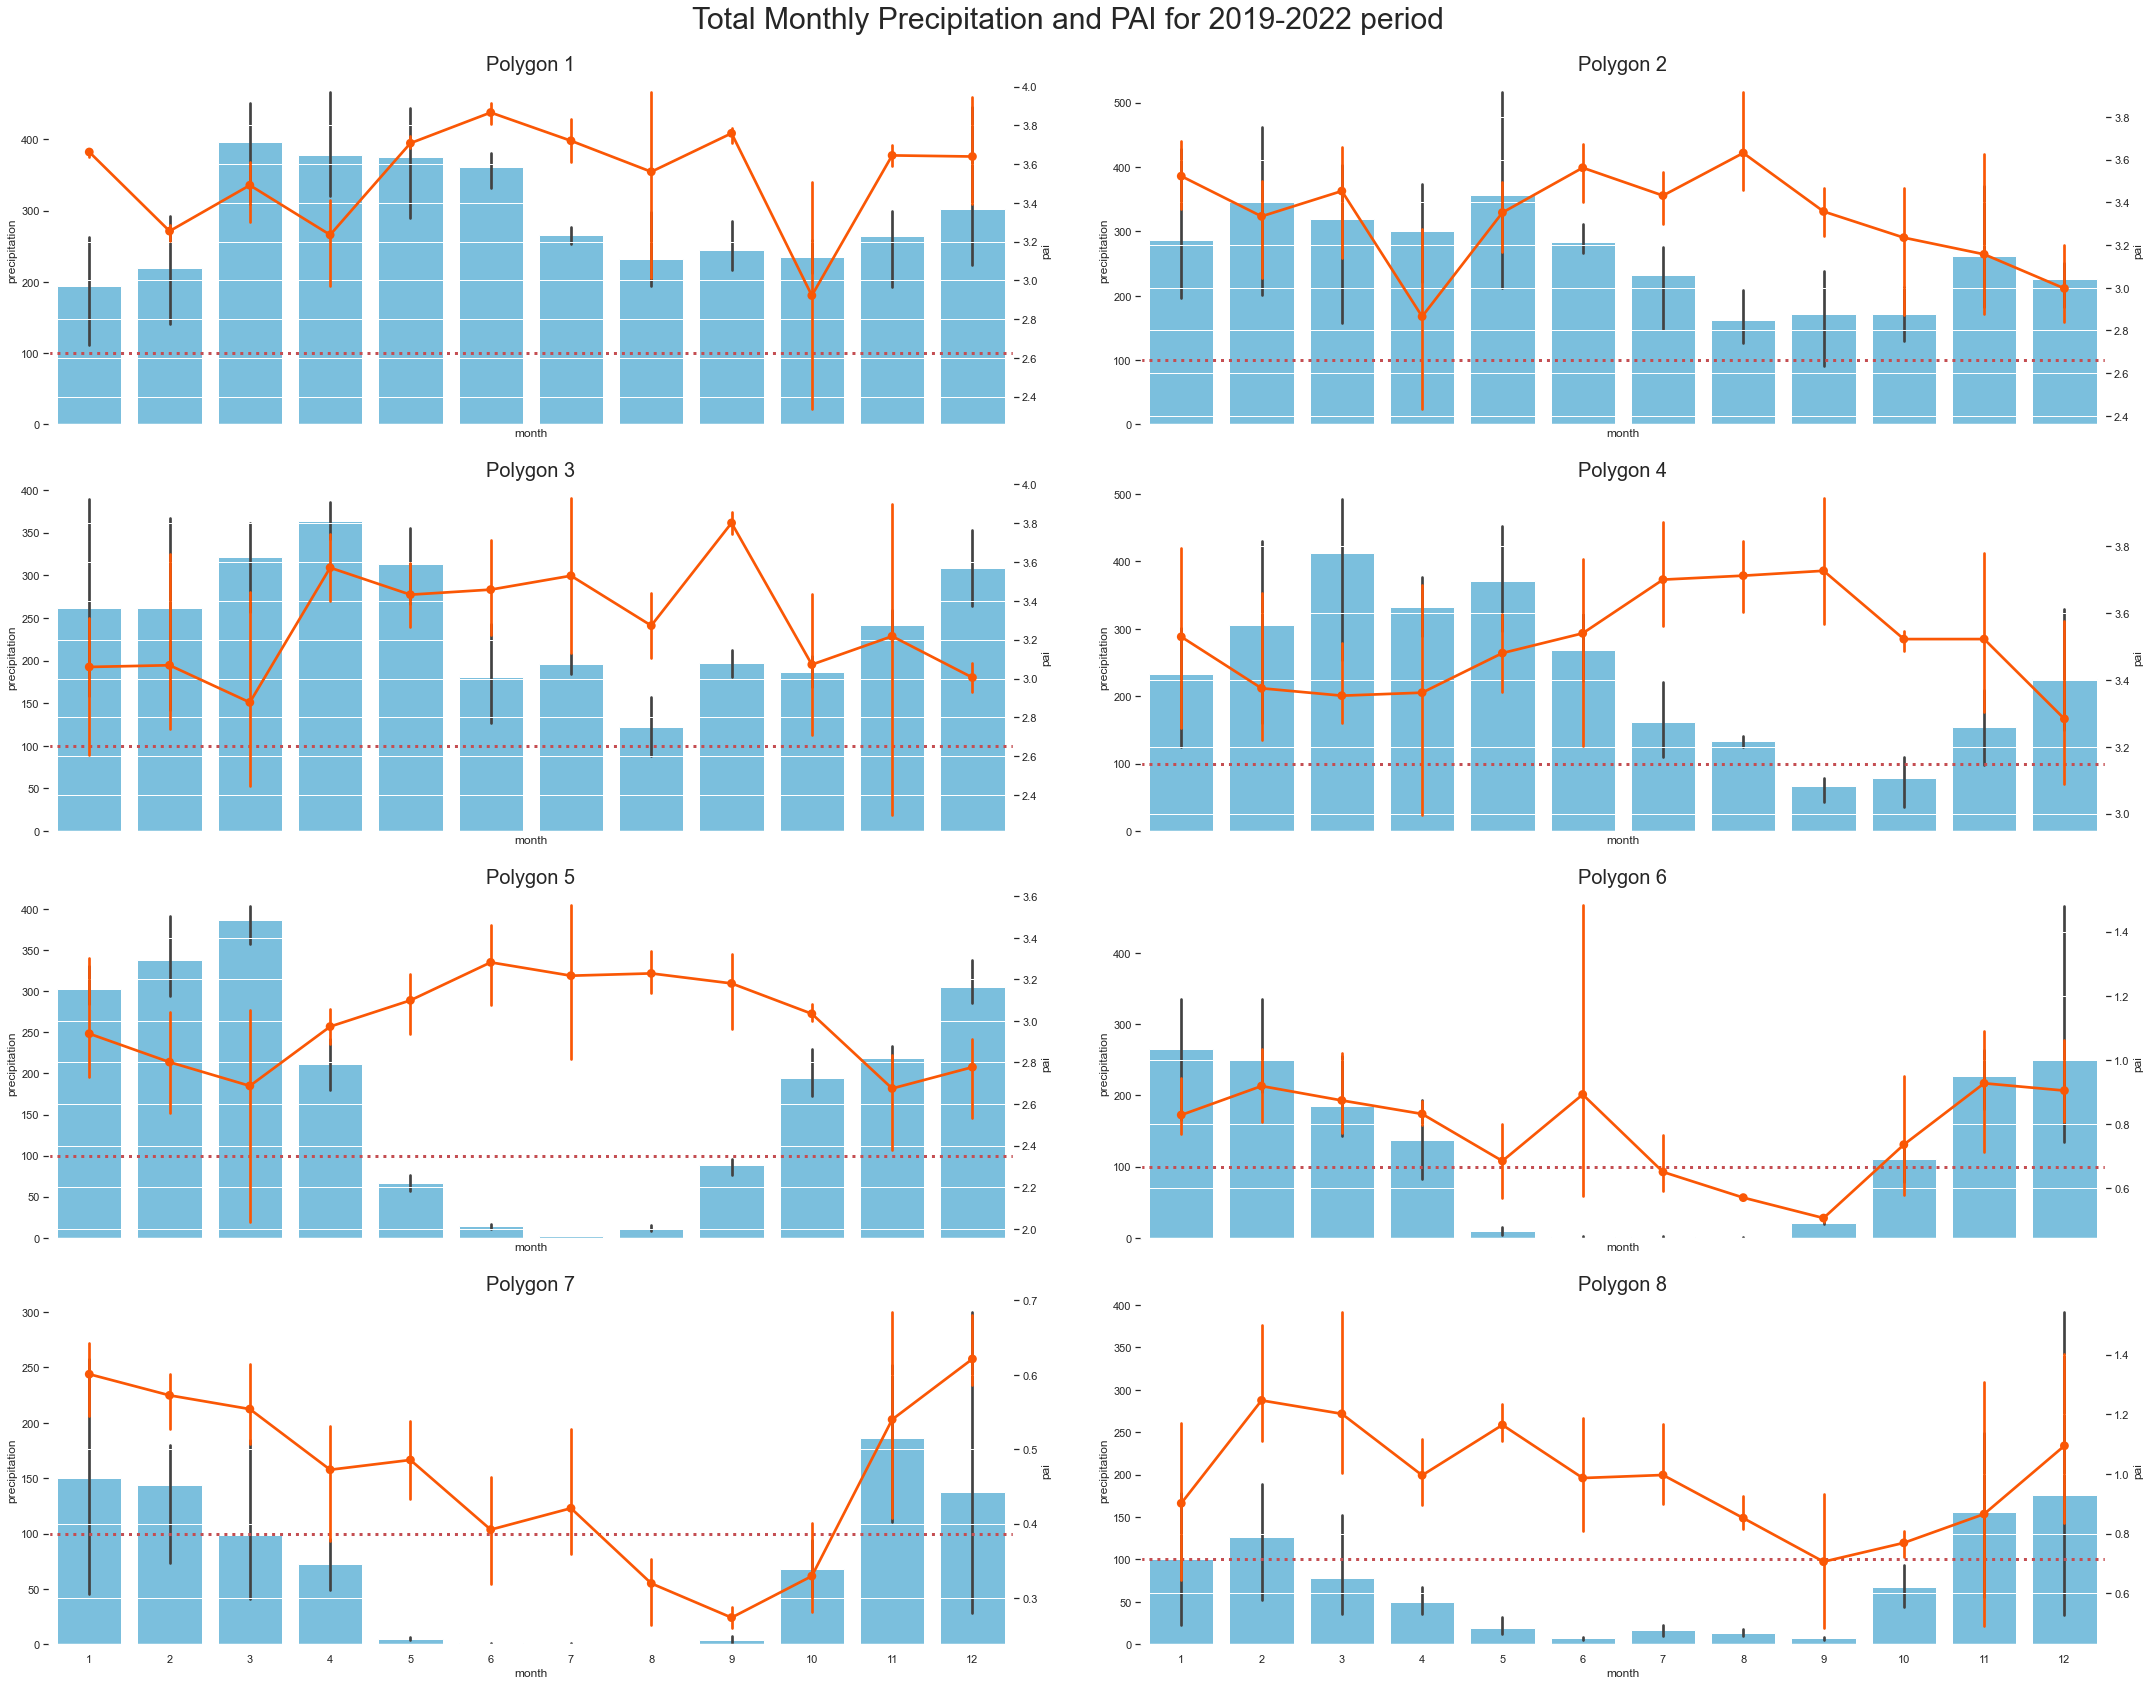

In [68]:
fig, ax = plot.layered_plot_per_polygon(monthly_data, 
                                        x='month',
                                        bar_y='precipitation',
                                        line_y='pai',
                                        title="Total Monthly Precipitation and PAI for 2019-2022 period")
                                        
# Draw a horizontal line at 100mm precipitation, that signifies a dry month.
[subplot.axhline(y=100, color = 'r', linestyle = 'dotted', linewidth=3) 
 for subplot in fig.get_axes() if subplot in ax]

plt.savefig(f'../../reports/figures/exploratory/layered_monthly_with_error_bars_precipitation_pai_2019_to_2022.png')

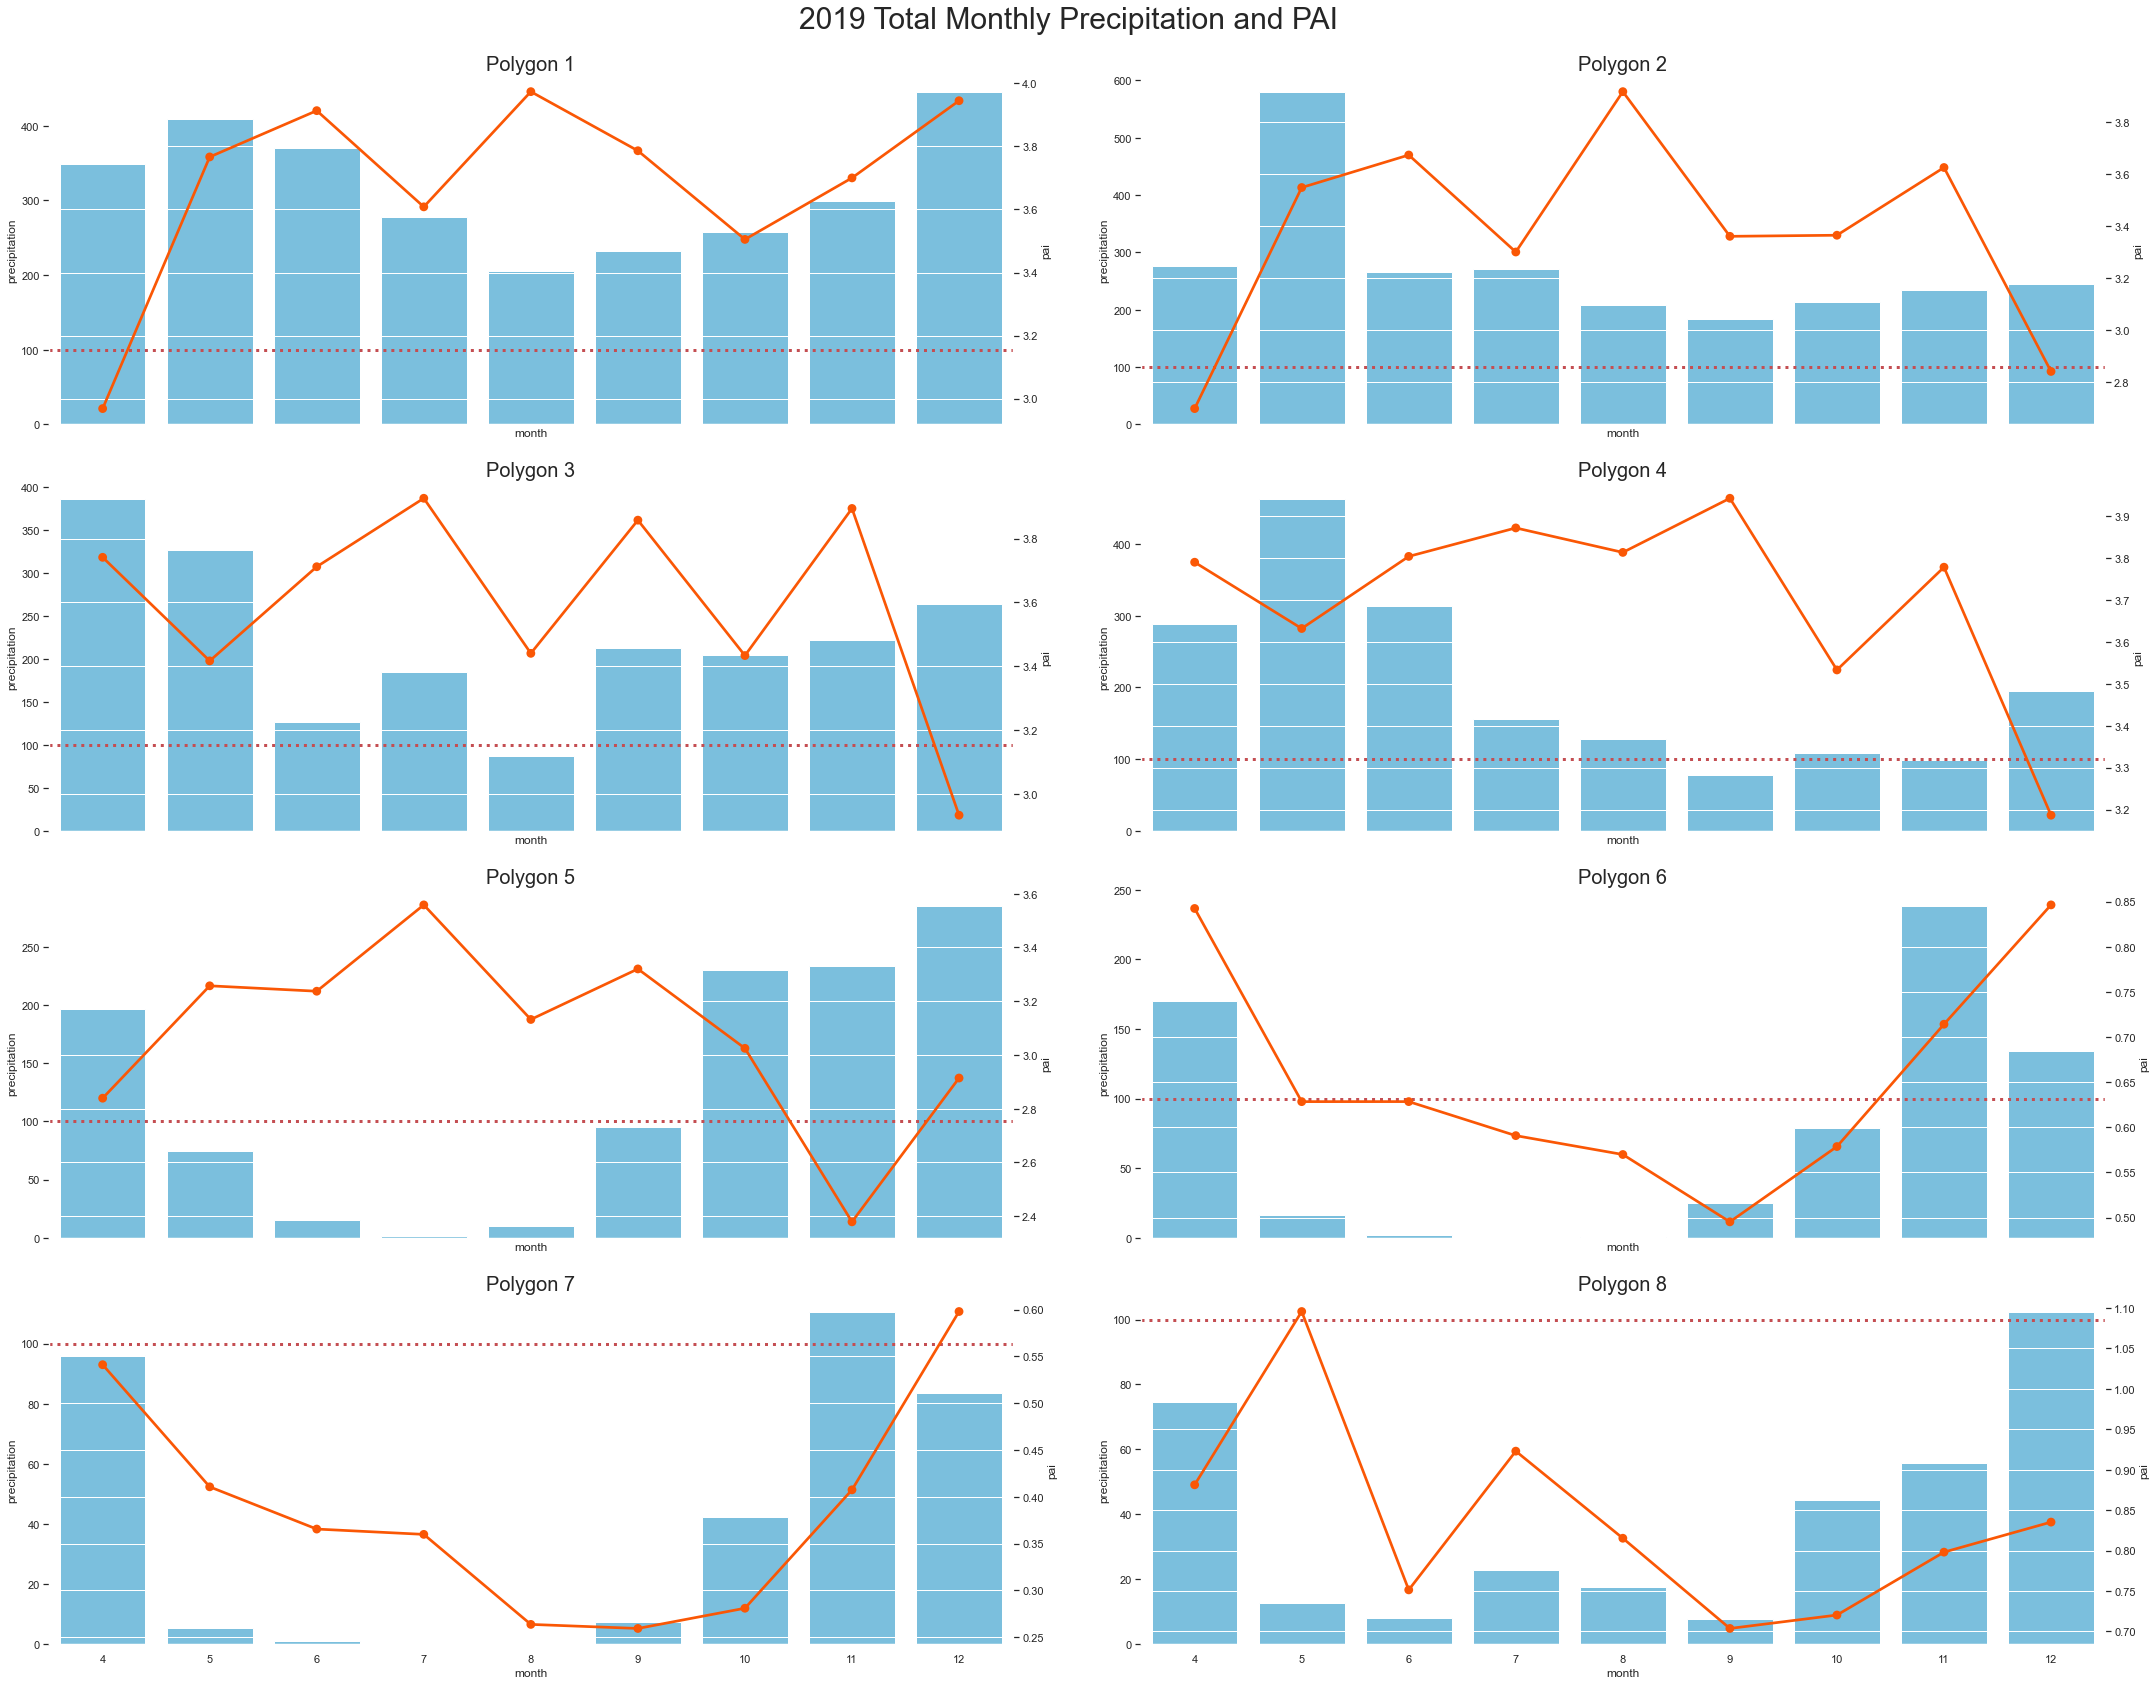

In [69]:
fig, ax = plot.layered_plot_per_polygon(monthly_data[monthly_data.year == 2019], 
                                        x='month',
                                        bar_y='precipitation',
                                        line_y='pai',
                                        title="2019 Total Monthly Precipitation and PAI")

# Draw a horizontal line at 100mm precipitation, that signifies a dry month.
[subplot.axhline(y=100, color = 'r', linestyle = 'dotted', linewidth=3) 
 for subplot in fig.get_axes() if subplot in ax]

plt.savefig(f'../../reports/figures/exploratory/layered_monthly_mean_precipitation_pai_2019.png')

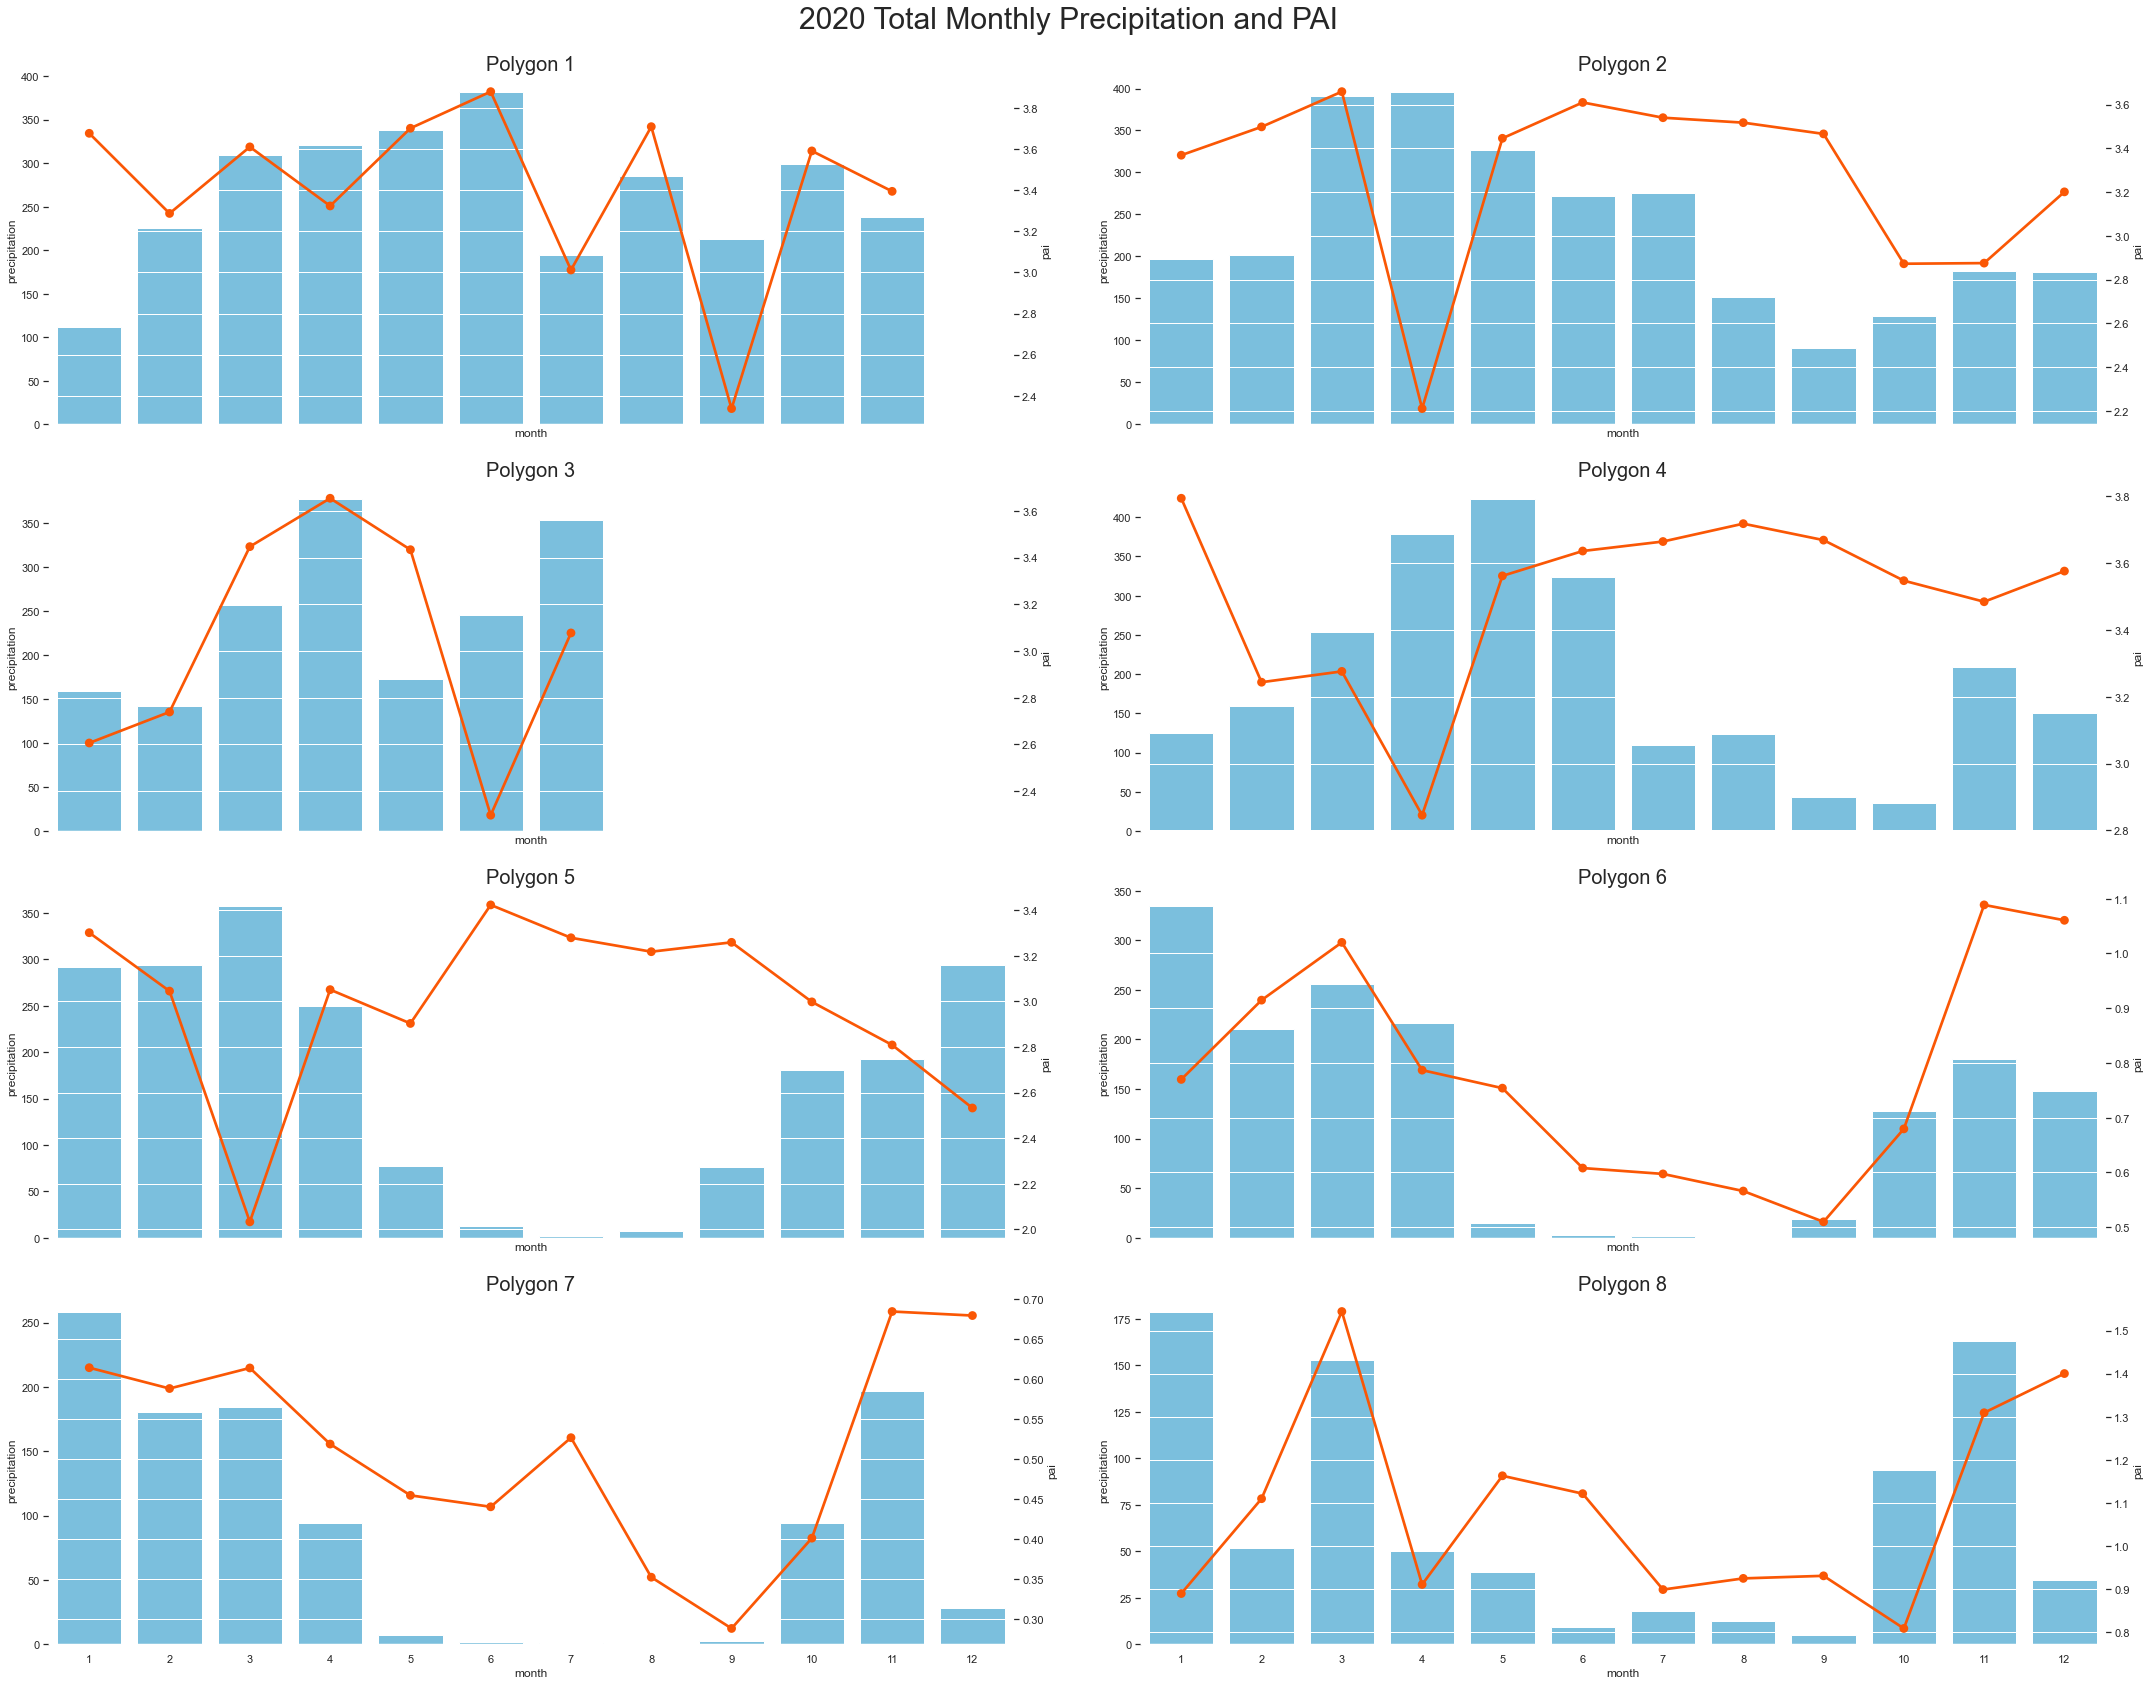

In [70]:
plot.layered_plot_per_polygon(monthly_data[monthly_data.year == 2020], 
                              x='month',
                              bar_y='precipitation',
                              line_y='pai',
                              title="2020 Total Monthly Precipitation and PAI")

# Draw a horizontal line at 100mm precipitation, that signifies a dry month.
[subplot.axhline(y=100, color = 'r', linestyle = 'dotted', linewidth=3) 
 for subplot in fig.get_axes() if subplot in ax]

plt.savefig(f'../../reports/figures/exploratory/layered_monthly_mean_precipitation_pai_2020.png')

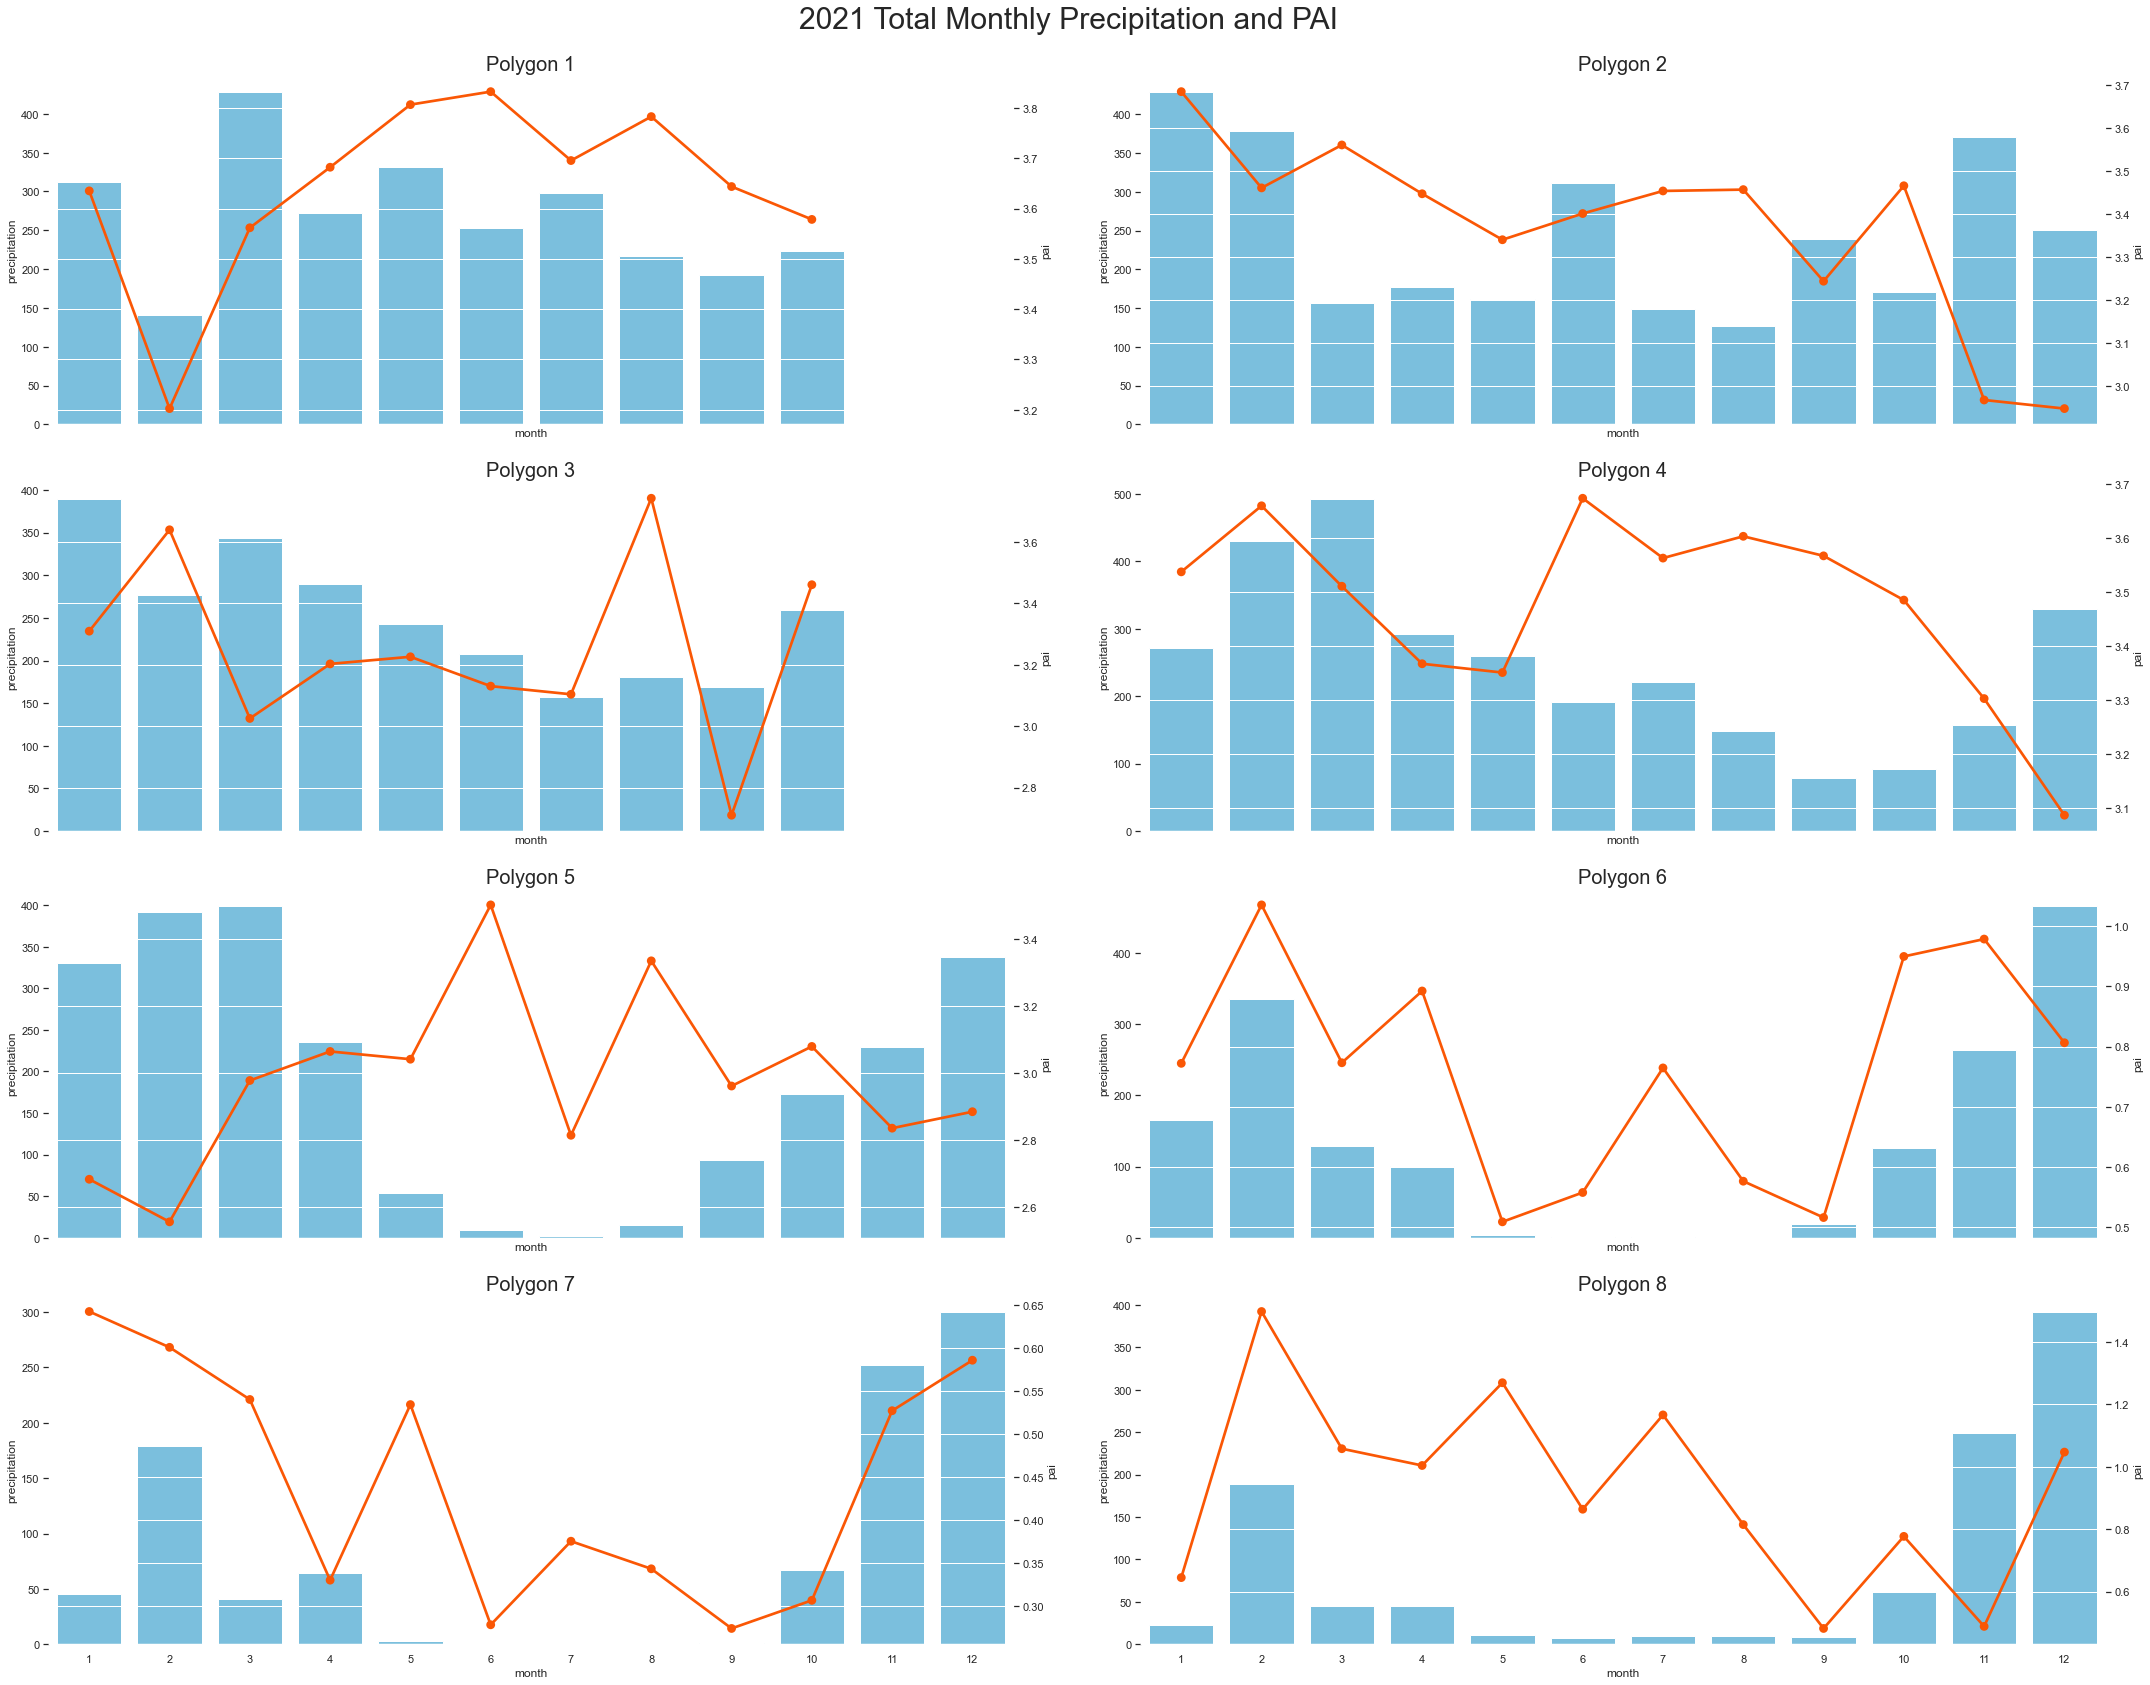

In [71]:
plot.layered_plot_per_polygon(monthly_data[monthly_data.year == 2021], 
                              x='month',
                              bar_y='precipitation',
                              line_y='pai',
                              title="2021 Total Monthly Precipitation and PAI")

# Draw a horizontal line at 100mm precipitation, that signifies a dry month.
[subplot.axhline(y=100, color = 'r', linestyle = 'dotted', linewidth=3) 
 for subplot in fig.get_axes() if subplot in ax]

plt.savefig(f'../../reports/figures/exploratory/layered_monthly_mean_precipitation_pai_2021.png')

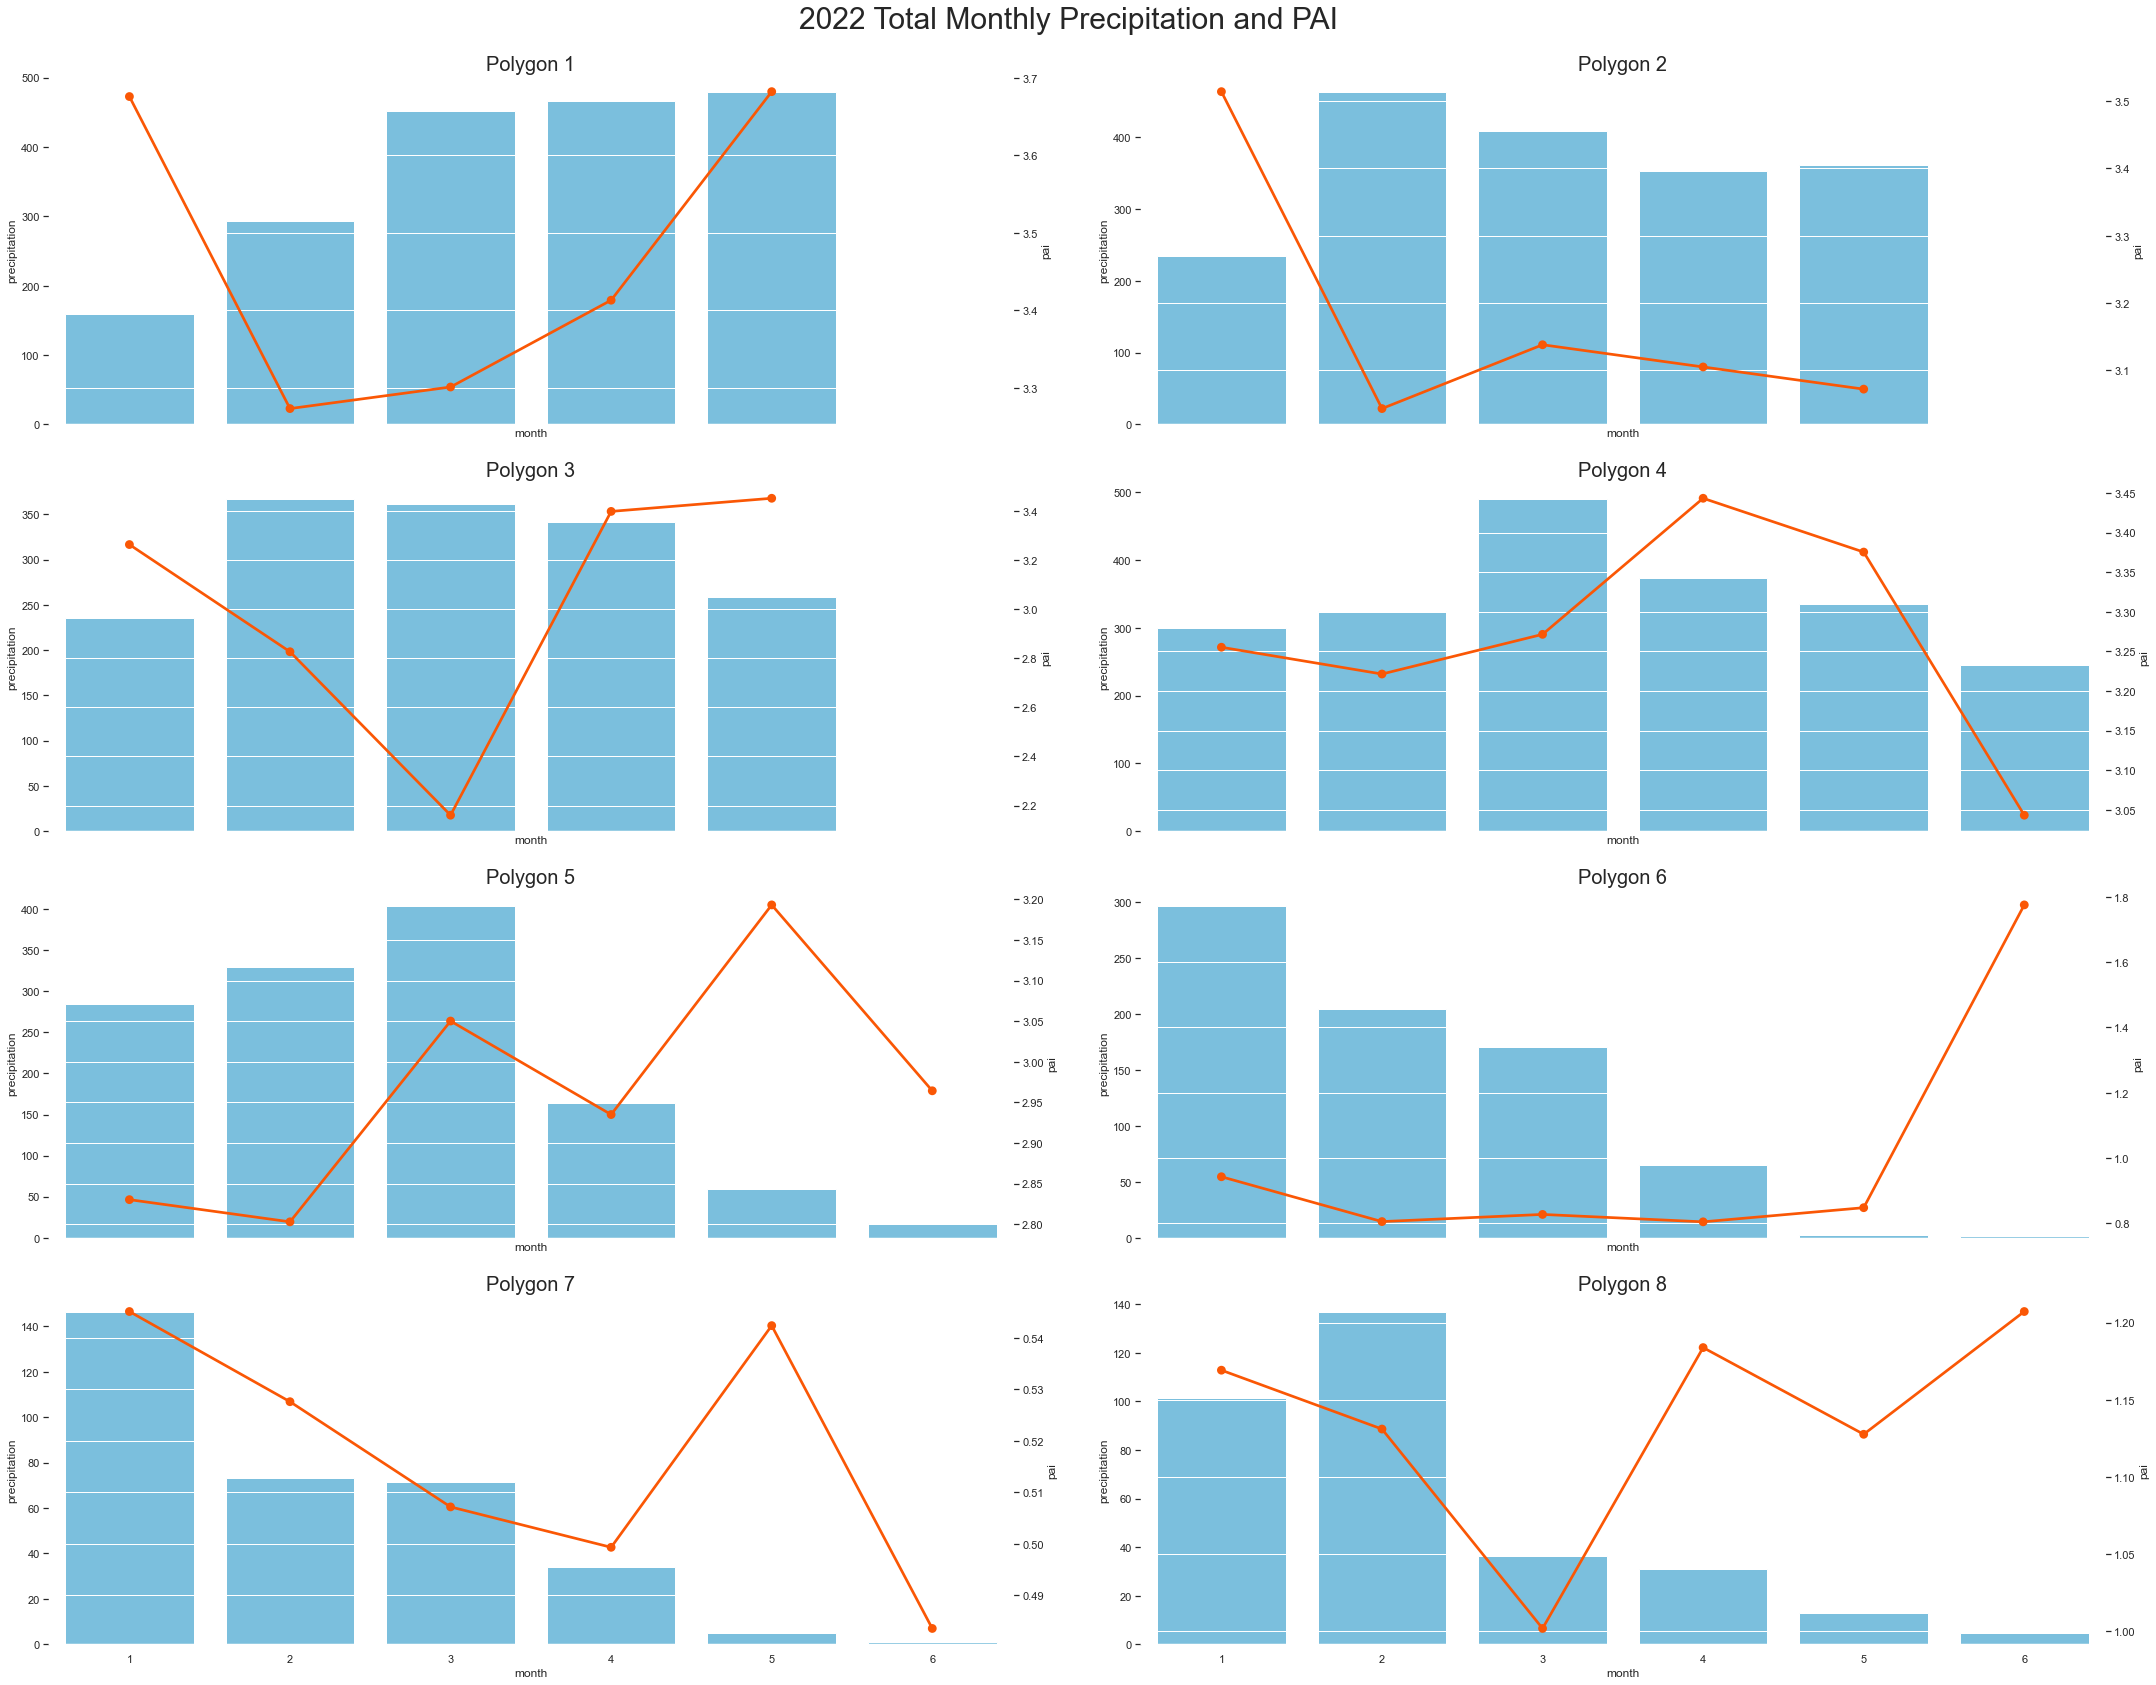

In [72]:
plot.layered_plot_per_polygon(monthly_data[monthly_data.year == 2022], 
                              x='month',
                              bar_y='precipitation',
                              line_y='pai',
                              title="2022 Total Monthly Precipitation and PAI")

# Draw a horizontal line at 100mm precipitation, that signifies a dry month.
[subplot.axhline(y=100, color = 'r', linestyle = 'dotted', linewidth=3) 
 for subplot in fig.get_axes() if subplot in ax]

plt.savefig(f'../../reports/figures/exploratory/layered_monthly_mean_precipitation_pai_2022.png')

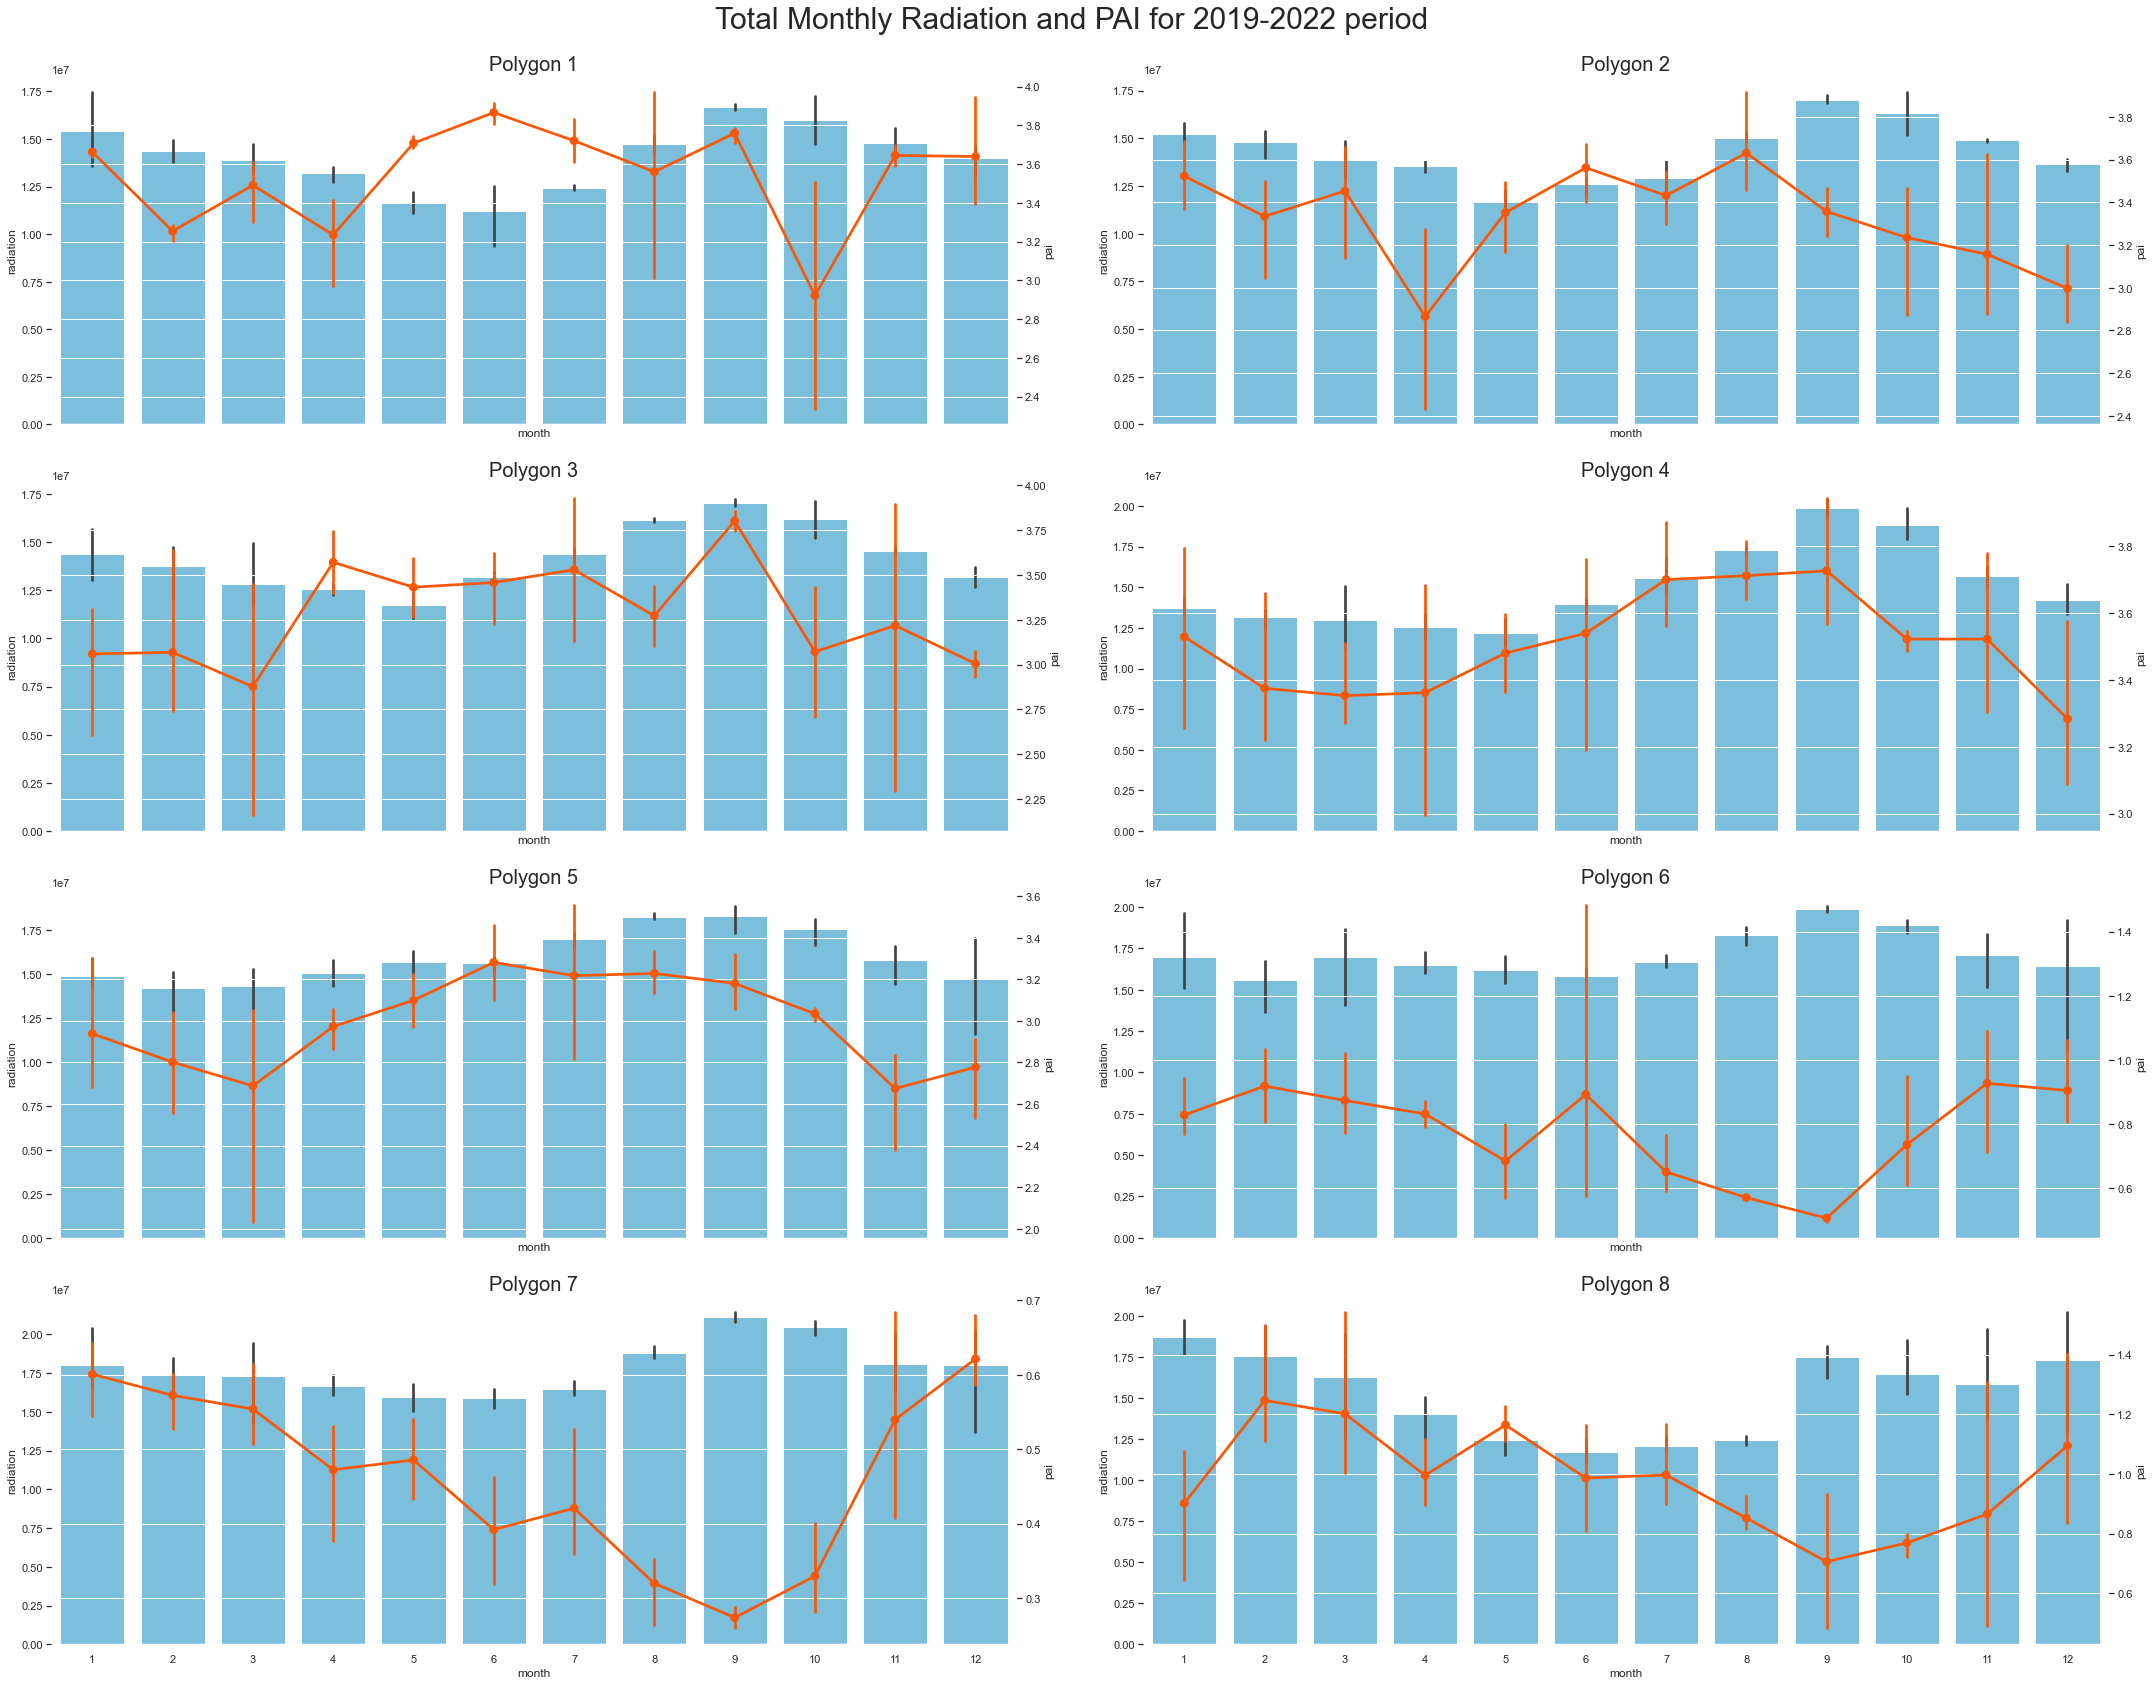

In [73]:
plot.layered_plot_per_polygon(monthly_data, 
                              x='month',
                              bar_y='radiation',
                              line_y='pai',
                              title="Total Monthly Radiation and PAI for 2019-2022 period")

plt.savefig(f'../../reports/figures/exploratory/layered_monthly_with_error_bars_radiation_pai_2019_to_2022.png')

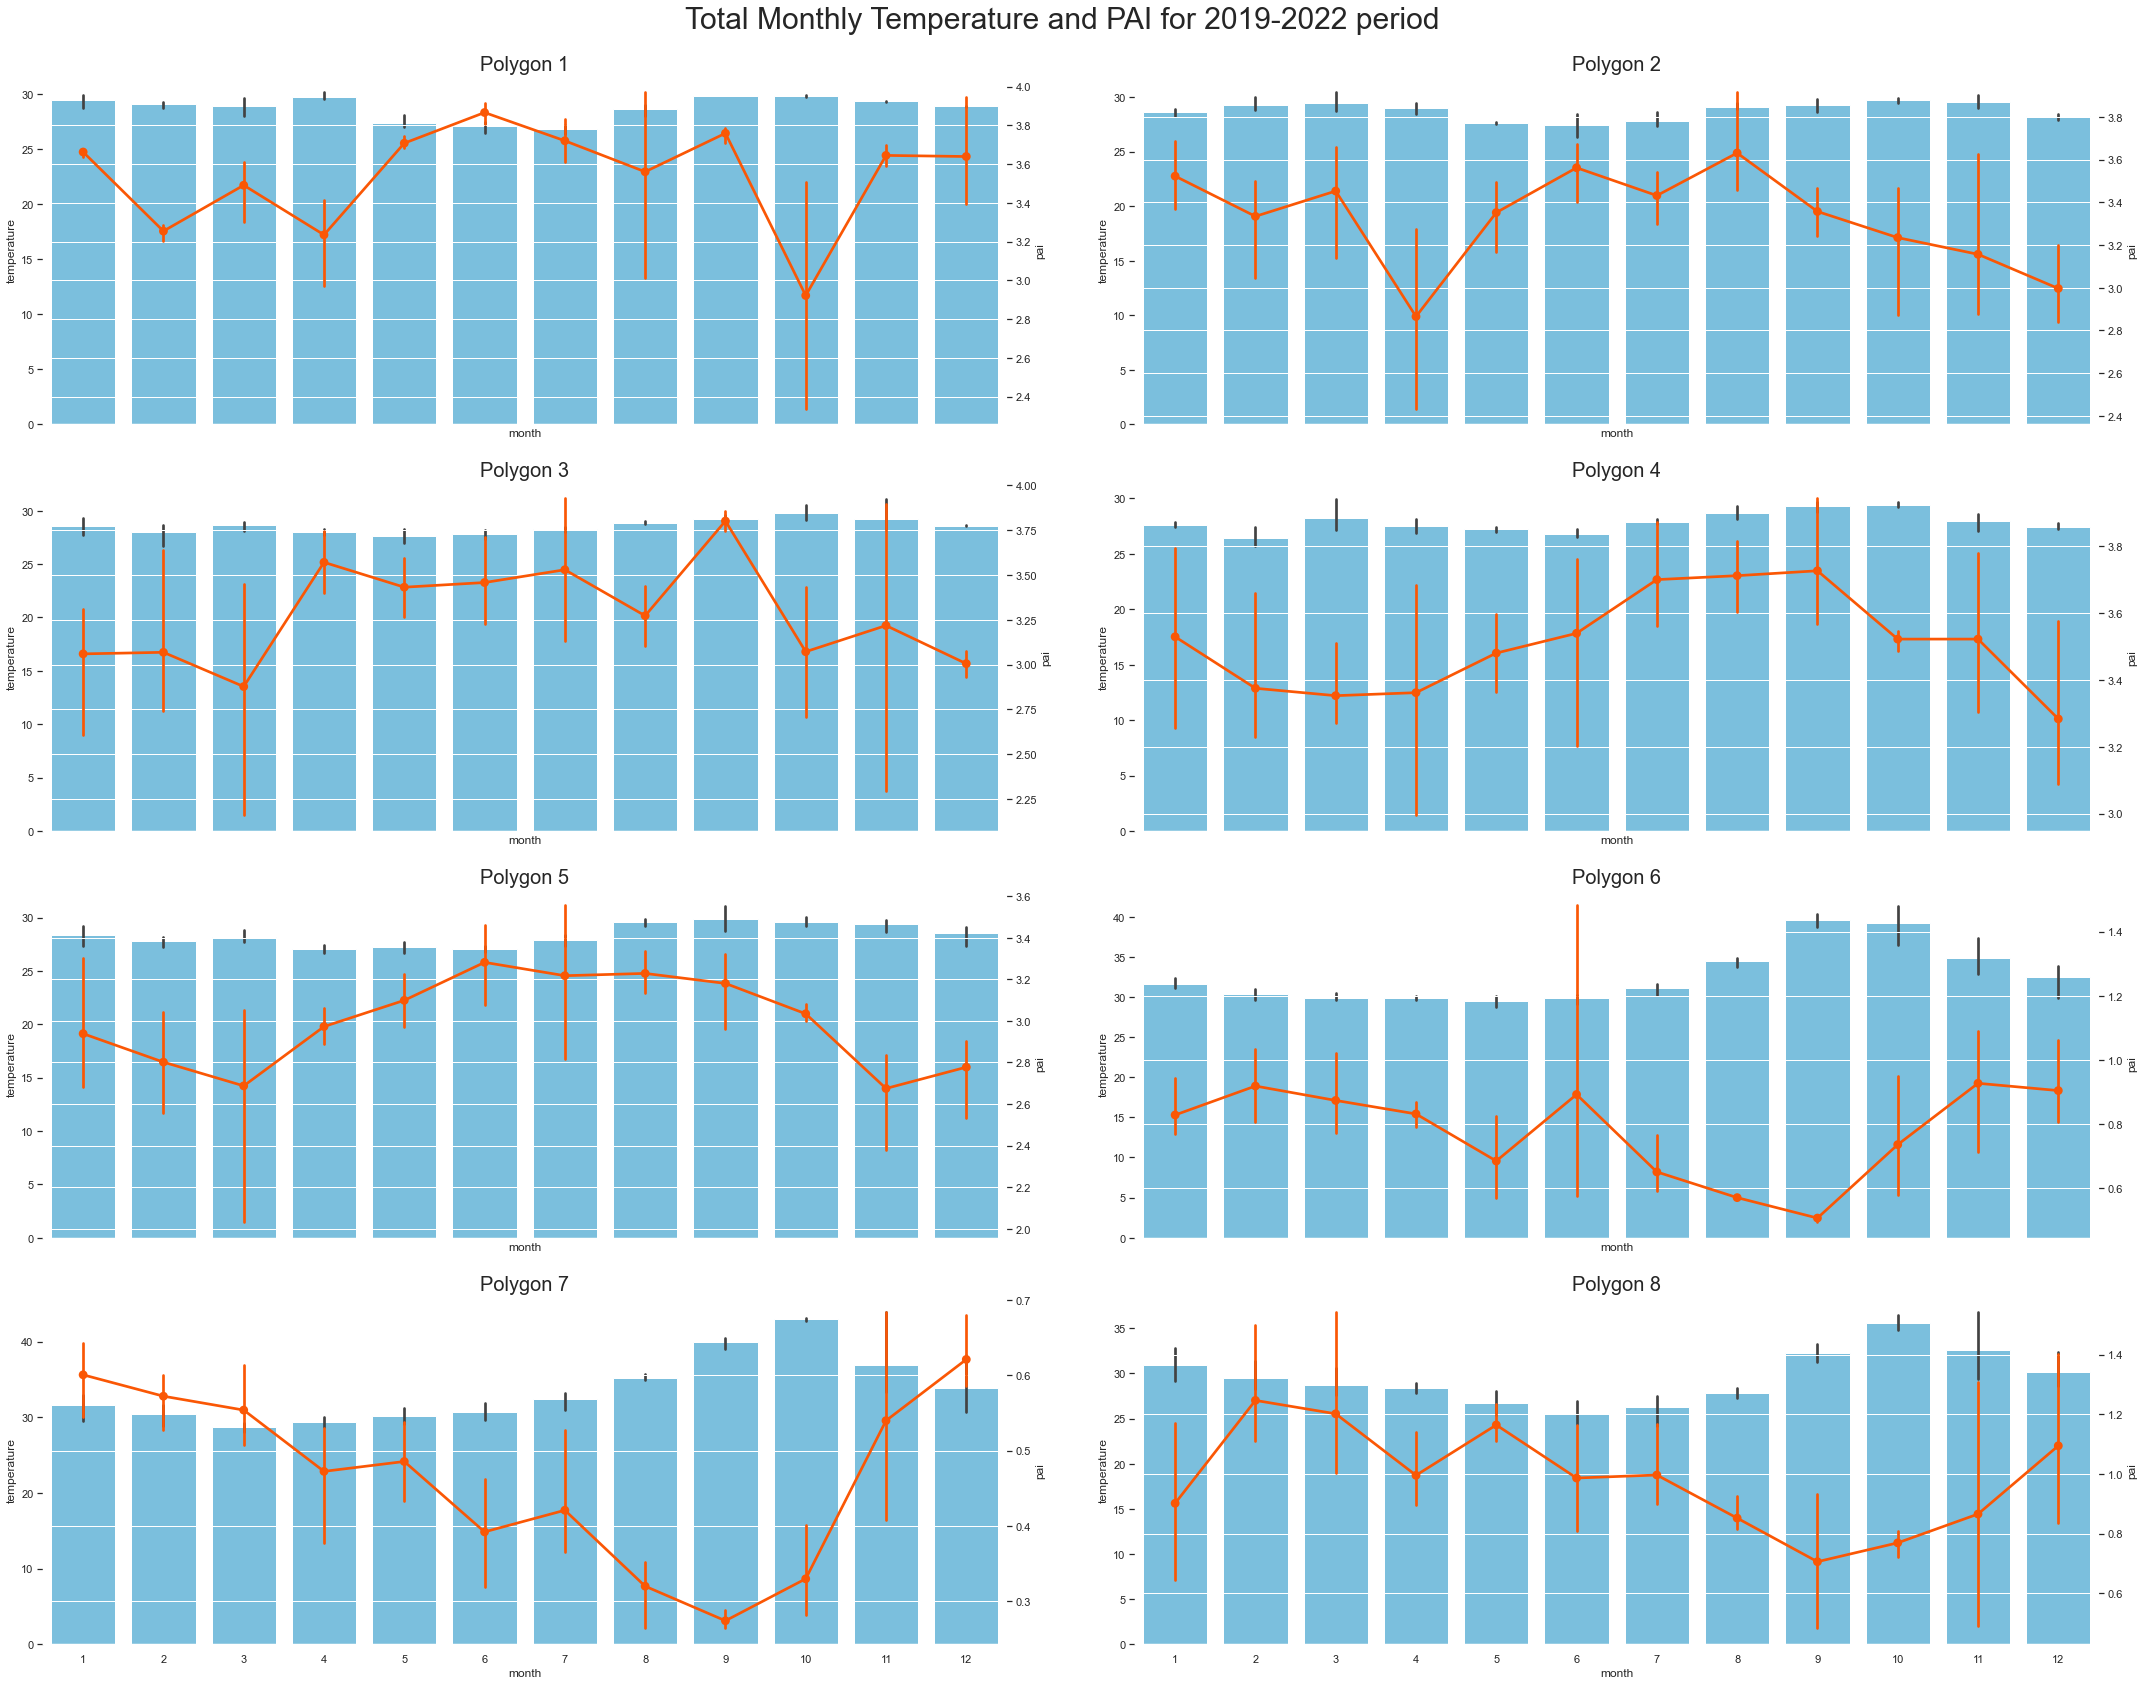

In [74]:
plot.layered_plot_per_polygon(monthly_data, 
                              x='month',
                              bar_y='temperature',
                              line_y='pai',
                              title="Total Monthly Temperature and PAI for 2019-2022 period")

plt.savefig(f'../../reports/figures/exploratory/layered_monthly_with_error_bars_temperature_pai_2019_to_2022.png')